In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # to plot charts
from collections import Counter
import os

# Modeling
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split

In [17]:
# Import dataset
df = pd.read_csv("diabetes.csv")
# Get familier with dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               769 non-null    int64  
 1   Glucose                   769 non-null    int64  
 2   BloodPressure             769 non-null    int64  
 3   SkinThickness             769 non-null    int64  
 4   Insulin                   769 non-null    int64  
 5   BMI                       769 non-null    float64
 6   DiabetesPedigreeFunction  769 non-null    float64
 7   Age                       769 non-null    int64  
 8   Outcome                   769 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.2 KB


In [18]:
# Show top 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
# Explore missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
# Correcting missing values in blood pressure
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean()) # There are 35 records with 0 BloodPressure in dataset
# Correcting missing values in BMI
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())
# Correct missing values in Insulin and SkinThickness

df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())

In [21]:
# Review dataset statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,3.840052,121.683337,72.261444,27.328999,93.801040,32.455917,0.471590,33.269181,0.349805
std,3.370237,30.416231,12.109128,9.224328,105.977841,6.872291,0.331208,11.778737,0.477219
min,0.000000,44.000000,24.000000,7.000000,1.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,23.000000,29.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.000000,36.600000,0.626000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

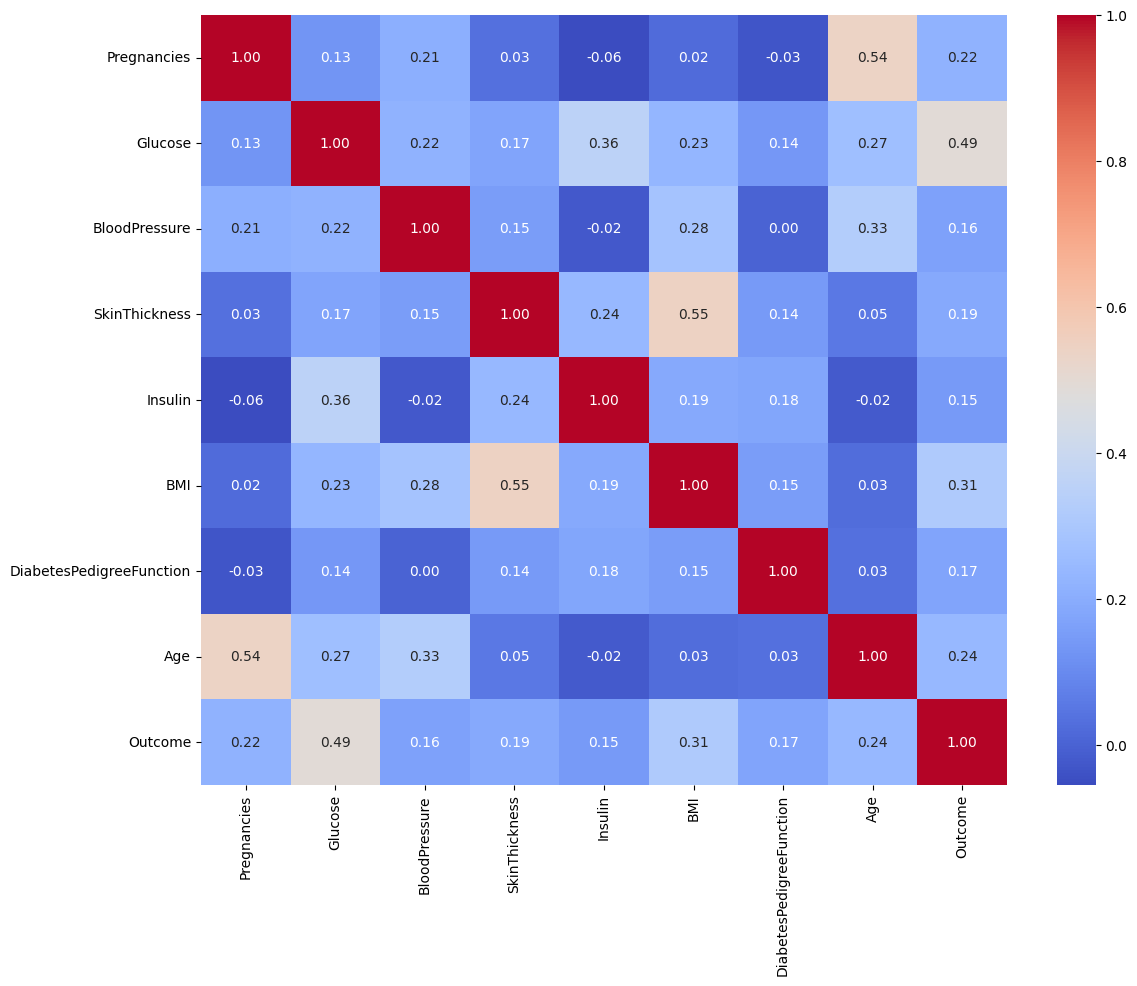

In [22]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

C:\Users\deepa\AppData\Local\Temp\ipykernel_5836\3295729909.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 1], color="Red", shade=True)
C:\Users\deepa\AppData\Local\Temp\ipykernel_5836\3295729909.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 0], ax=g, color="Green", shade=True)


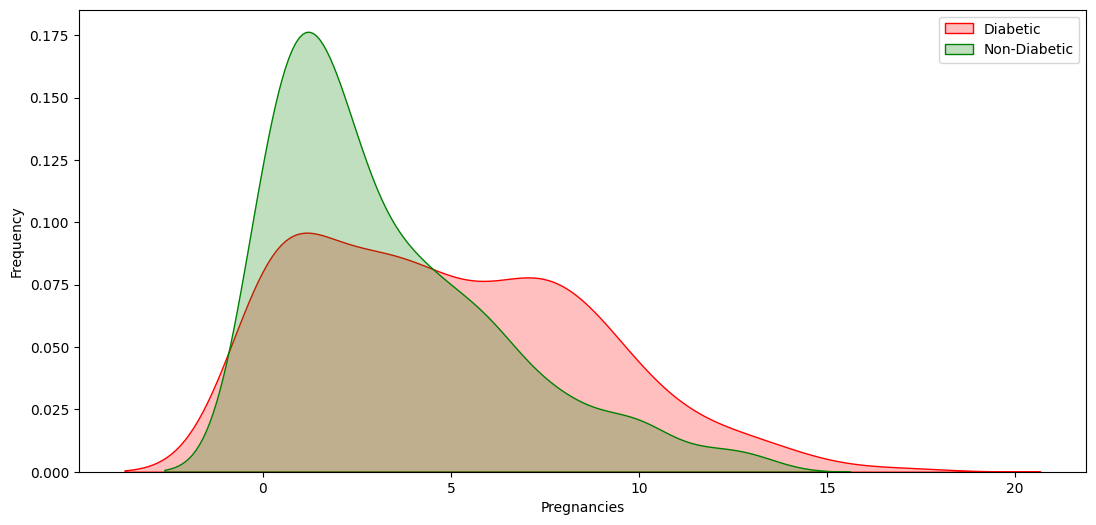

In [23]:
# Explore Pregnancies vs Outcome
plt.figure(figsize=(13,6))
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 1], color="Red", shade=True)
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 0], ax=g, color="Green", shade=True)
g.set_xlabel("Pregnancies")
g.set_ylabel("Frequency")
g.legend(["Diabetic", "Non-Diabetic"])
plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

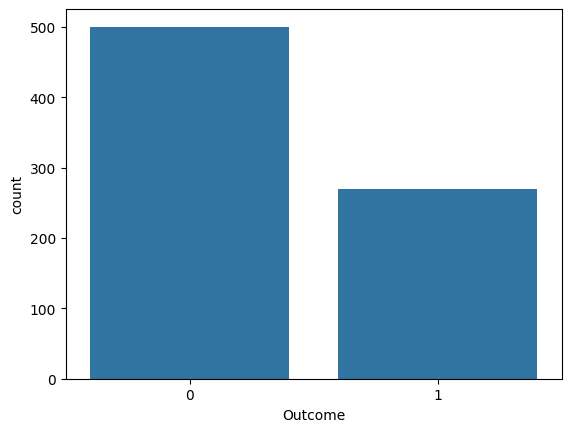

In [24]:
import seaborn as sns

sns.countplot(x='Outcome', data=df)




<Axes: xlabel='Outcome', ylabel='Glucose'>

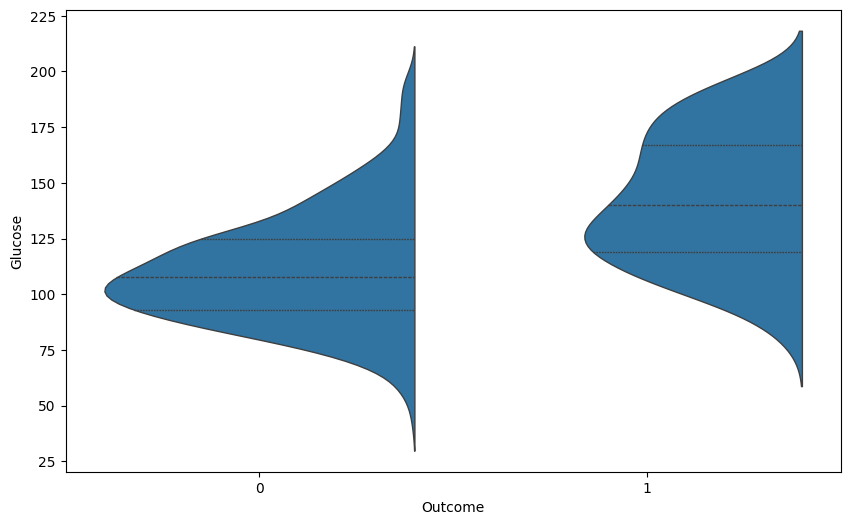

In [25]:
# Explore Gluecose vs Outcome
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Outcome", y="Glucose",
               split=True, inner="quart", linewidth=1)

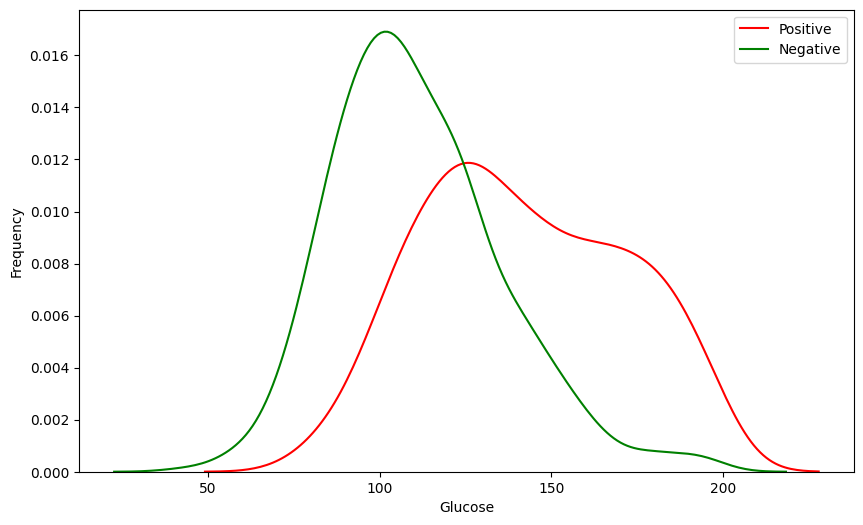

In [26]:
# Explore Glucose vs Outcome

plt.figure(figsize=(10,6))
g = sns.kdeplot(df["Glucose"][df["Outcome"] == 1], color="Red")
g = sns.kdeplot(df["Glucose"][df["Outcome"] == 0], ax =g, color="Green")
g.set_xlabel("Glucose")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

<Axes: xlabel='Glucose', ylabel='BMI'>

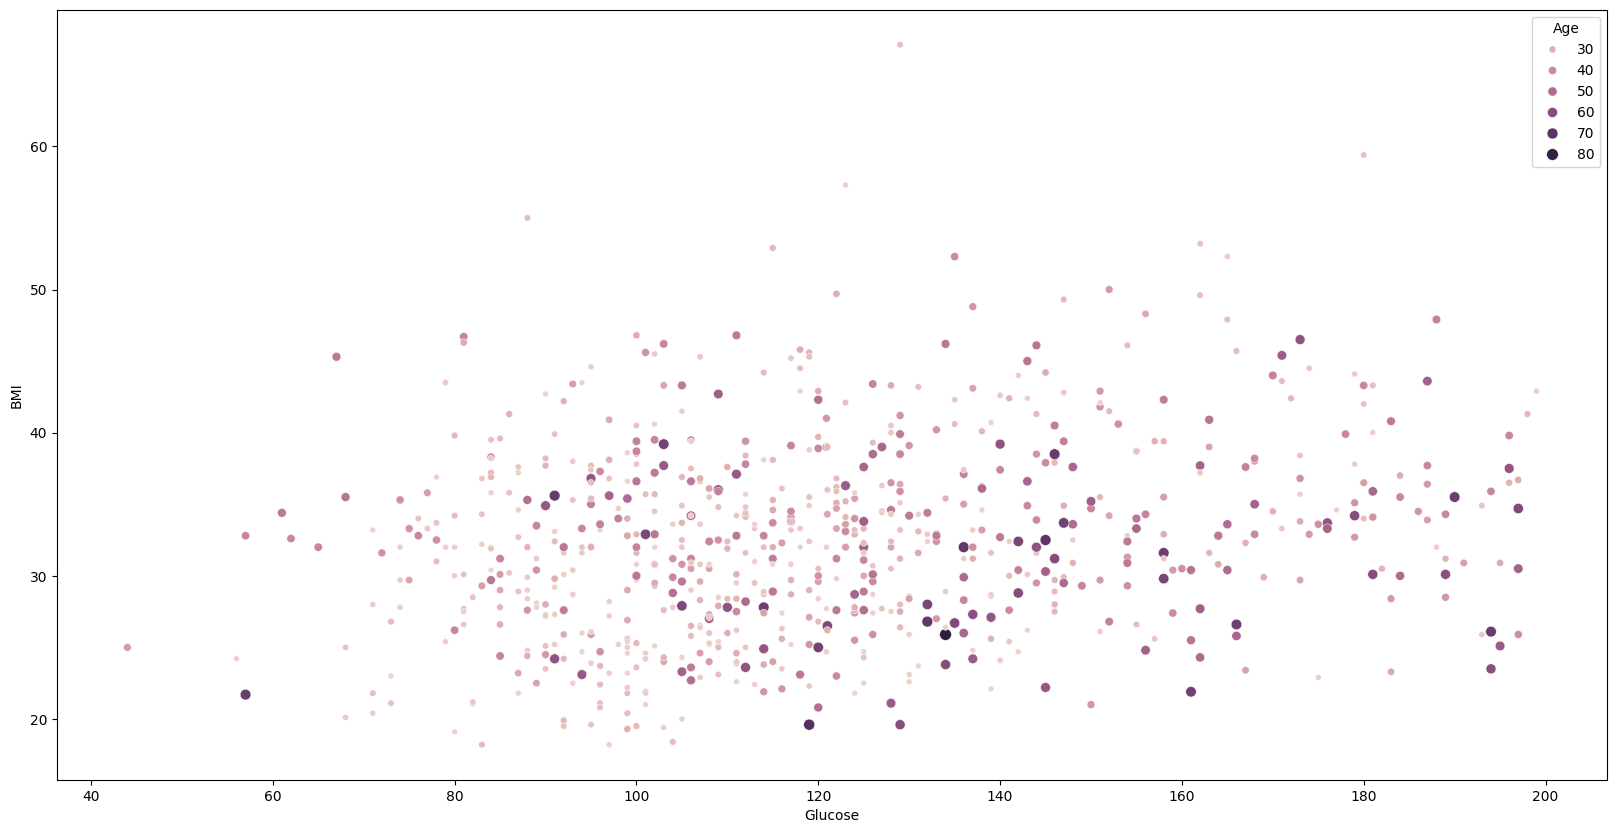

In [27]:
# Glucose vs BMI vs Age

plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Age", size="Age")

In [28]:
def detect_outliers(df,n,features):
    outlier_indices = []
    """
    Detect outliers from given list of features. It returns a list of the indices
    according to the observations containing more than n outliers according
    to the Tukey method
    """
    # iterate over features(columns)
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from numeric features
outliers_to_drop = detect_outliers(df, 2 ,["Pregnancies", 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness', 'Insulin', 'Age'])

In [29]:
df.drop(df.loc[outliers_to_drop].index, inplace=True)

In [30]:
# Data Transformation
q  = QuantileTransformer()
X = q.fit_transform(df)
transformedDF = q.transform(X)
transformedDF = pd.DataFrame(X)
transformedDF.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
# Show top 5 rows
transformedDF.head()

c:\Python310\lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (766). n_quantiles is set to n_samples.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.747712,0.812418,0.518301,0.805229,0.256209,0.593464,0.752941,0.888235,1.0
1,0.232026,0.091503,0.291503,0.647712,0.256209,0.213725,0.477124,0.556209,0.0
2,0.864052,0.957516,0.233987,0.358824,0.256209,0.077778,0.784314,0.582353,1.0
3,0.232026,0.124837,0.291503,0.358824,0.664706,0.284967,0.107190,0.000000,0.0
4,0.000000,0.723529,0.005229,0.805229,0.834641,0.929412,0.998693,0.603922,1.0


In [31]:
features = df.drop(["Outcome"], axis=1)
labels = df["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=7)

In [32]:
def evaluate_model(models):
    """
    Takes a list of models and returns chart of cross validation scores using mean accuracy
    """
    
    # Cross validate model with Kfold stratified cross val
    kfold = StratifiedKFold(n_splits = 10)
    
    result = []
    for model in models :
        result.append(cross_val_score(estimator = model, X = x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    result_df = pd.DataFrame({
        "CrossValMeans":cv_means,
        "CrossValerrors": cv_std,
        "Models":[
            "LogisticRegression",
            "DecisionTreeClassifier",
            "AdaBoostClassifier",
            "SVC",
            "RandomForestClassifier",
            "GradientBoostingClassifier",
            "KNeighborsClassifier"
        ]
    })

    # Generate chart
    bar = sns.barplot(x = "CrossValMeans", y = "Models", data = result_df, orient = "h")
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Cross validation scores")
    return result_df

,CrossValMeans,CrossValerrors,Models
0,0.746436,0.049309,LogisticRegression
1,0.677463,0.062306,DecisionTreeClassifier
2,0.683159,0.073619,AdaBoostClassifier
3,0.761251,0.041392,SVC
4,0.753878,0.075555,RandomForestClassifier
5,0.746541,0.087685,GradientBoostingClassifier
6,0.718484,0.073027,KNeighborsClassifier


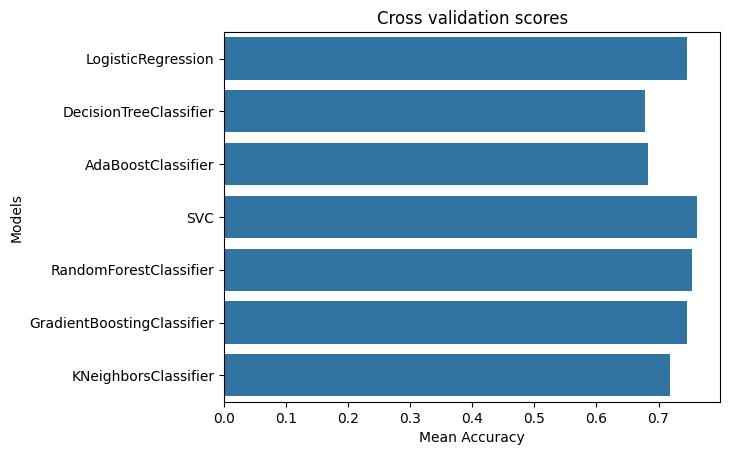

In [33]:
# Modeling step Test differents algorithms 
random_state = 30
models = [
    LogisticRegression(random_state = random_state, solver='liblinear'),
    DecisionTreeClassifier(random_state = random_state),
    AdaBoostClassifier(DecisionTreeClassifier(random_state = random_state), random_state = random_state, learning_rate = 0.2),
    SVC(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    KNeighborsClassifier(),
]
evaluate_model(models)

In [34]:
# Import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
def analyze_grid_result(grid_result):
    '''
    Analysis of GridCV result and predicting with test dataset
    Show classification report at last
    '''
    # Best parameters and accuracy
    print("Tuned hyperparameters: (best parameters) ", grid_result.best_params_)
    print("Accuracy :", grid_result.best_score_)
    
    means = grid_result.cv_results_["mean_test_score"]
    stds = grid_result.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, grid_result.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()
    print("Detailed classification report:")
    y_true, y_pred = y_test, grid_result.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

In [35]:
# Define models and parameters for LogisticRegression
model = LogisticRegression(solver='liblinear')
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# Define grid search
grid = dict(solver = solvers, penalty = penalty, C = c_values)
cv = StratifiedKFold(n_splits = 50, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = cv, scoring = 'accuracy', error_score = 0)
logi_result = grid_search.fit(x_train, y_train)
# Logistic Regression Hyperparameter Result
analyze_grid_result(logi_result)

Tuned hyperparameters: (best parameters)  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.7774545454545454
0.775 (+/-0.204) for {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.775 (+/-0.204) for {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.775 (+/-0.204) for {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.777 (+/-0.193) for {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.773 (+/-0.206) for {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.748 (+/-0.209) for {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.768 (+/-0.205) for {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.712 (+/-0.219) for {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.768 (+/-0.199) for {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.701 (+/-0.202) for {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

Detailed classification report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       144
           1    

In [36]:
# Define models and parameters for LogisticRegression
model = SVC()
# Define grid search
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]
cv = StratifiedKFold(n_splits = 2, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = tuned_parameters, cv = cv, scoring = 'accuracy', error_score = 0)
scv_result = grid_search.fit(x_train, y_train)
# SVC Hyperparameter Result
analyze_grid_result(scv_result)

Tuned hyperparameters: (best parameters)  {'C': 10, 'kernel': 'linear'}
Accuracy : 0.7779850746268657
0.709 (+/-0.045) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.731 (+/-0.015) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.683 (+/-0.037) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.729 (+/-0.004) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.625 (+/-0.034) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.720 (+/-0.022) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.632 (+/-0.019) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.718 (+/-0.034) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.772 (+/-0.037) for {'C': 1, 'kernel': 'linear'}
0.778 (+/-0.019) for {'C': 10, 'kernel': 'linear'}
0.759 (+/-0.004) for {'C': 100, 'kernel': 'linear'}
0.744 (+/-0.026) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       144
           1       0.68      0

In [37]:
# Define models and parameters for LogisticRegression
model = RandomForestClassifier(random_state=42)
# Define grid search
tuned_parameters = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
cv = StratifiedKFold(n_splits = 2, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = tuned_parameters, cv = cv, scoring = 'accuracy', error_score = 0)
grid_result = grid_search.fit(x_train, y_train)
# SVC Hyperparameter Result
analyze_grid_result(grid_result)

c:\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTre

Tuned hyperparameters: (best parameters)  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 200}
Accuracy : 0.7705223880597015
0.765 (+/-0.007) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
0.765 (+/-0.007) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
0.765 (+/-0.007) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
0.765 (+/-0.007) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500}
0.763 (+/-0.011) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}
0.761 (+/-0.015) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
0.761 (+/-0.000) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
0.767 (+/-0.019) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}
0.761 (+/-0.0

In [38]:
# Test predictions
y_pred = logi_result.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       144
           1       0.70      0.58      0.64        86

    accuracy                           0.75       230
   macro avg       0.74      0.72      0.72       230
weighted avg       0.75      0.75      0.75       230



In [39]:
x_test['pred'] = y_pred
print(x_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
236            7    181.0           84.0             21      192  35.9   
716            3    173.0           78.0             39      185  33.8   
767            1     93.0           70.0             31       29  30.4   
499            6    154.0           74.0             32      193  29.3   
61             8    133.0           72.0             23       29  32.9   
..           ...      ...            ...            ...      ...   ...   
189            5    139.0           80.0             35      160  31.6   
351            4    137.0           84.0             23       29  31.2   
120            0    162.0           76.0             56      100  53.2   
108            3     83.0           58.0             31       18  34.3   
637            2     94.0           76.0             18       66  31.6   

     DiabetesPedigreeFunction  Age  pred  
236                     0.586   51     1  
716                     0

In [40]:
# test for to prediction

new_data = [[1, 85, 66, 29, 0, 26.6, 0.351, 31],  # Example new data point 1
            [6, 148, 72, 35, 0, 33.6, 0.627, 50]]  # Example new data point 2

# Make predictions on new data
predictions = logi_result.predict(new_data)
print("Predictions:", predictions)

Predictions: [0 1]


c:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [42]:
import joblib

# Assuming 'model' is your trained model in test.ipynb
joblib.dump(logi_result, 'trained_model.pkl')


['trained_model.pkl']